# Projekt
1. Stwórz dla domu maklerskiego graficzny dashboard, który pozwoli na podejmowanie decyzji o zakupie lub sprzedaży akcji Facebooka lub innych spółek. W tym celu wyświetl ceny akcji razem z średnią kroczącą z ostatnich 14 dni. Gdy aktualna cena spadnie poniżej średniej, to znak, że jesteśmy na górce i trzeba sprzedawać. Dodatkowo w dashboardzie umieść informacje o wolumenie sprzedaży, aby móc wykrywać nietypowe zdarzenia. Użyj w tym celu drugiej osi Y.

2. Notowania Facebooka ściągniesz stąd: https://www.nasdaq.com/market-activity/stocks/fb/historical Możesz także pobrać notowania innych interesujących Cię spółek. Te same dane znajdziesz także w pliku M08/data/fb.csv.

3. Zauważysz, że dane są posortowane od najnowszych do najstarszych. Jak odwrócisz tę kolejność? Poszukaj!

4. Wyceny akcji są poprzedzone znakiem dolara, np. `$80.20`. Napisz funkcję, która przyjmuje pojedynczy string, usuwa znak dolara i zwraca float'a. Użyj metody `.map()` na pojedynczej kolumnie, aby wyzwolić tę funkcję na każdym wierszu danych.

<Axes: >

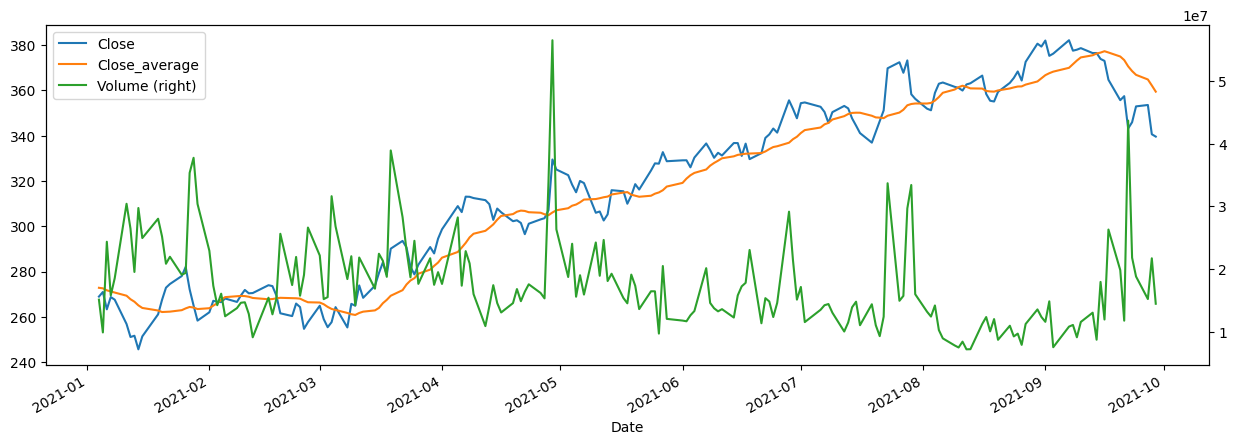

In [75]:
import pandas as pd

df = pd.read_csv(
    'data/fb.csv',
    parse_dates=['Date'],
    index_col='Date',
).rename(columns={
    'Close/Last': 'Close',
})
old_new = df.iloc[::-1]
def dolar(Close: int) -> int: 
    return float(Close.replace('$', ''))

old_new = old_new.assign(
    Close = lambda x: x['Close'].map(dolar)
)
old_new = old_new.assign(
    Close_average=lambda x: x['Close'].rolling(14).mean(),
)
ax = old_new['2021':].plot(
    y=['Close', 'Close_average'],
    figsize=(15, 5),
);

old_new['2021':].plot(
    y='Volume',
    figsize=(15, 5),
    secondary_y=True,
    ax=ax,
)
